In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import spearmanr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import pickle as pkl
import dateutil.relativedelta

sys.path.append('../utils/')

from utils import *

"""
Produced the merged df on which analyses can be run, both monthly and weekly. 
Normalized so that topics and terms are on each on their own scale.

Combines: KSU, Trends, benchmarks.

Output: merged_primary, merged_controls_primary.

All terms on the same scale (recipes), all Topics on the same scale (Okja).
"""

'\nProduced the merged df on which analyses can be run, both monthly and weekly. \nNormalized so that topics and terms are on each on their own scale.\n\nCombines: KSU, Trends, benchmarks.\n\nOutput: merged_primary, merged_controls_primary.\n\nAll terms on the same scale (recipes), all Topics on the same scale (Okja).\n'

In [127]:
units = 'months'

if units == 'weeks':
    #trends_prefix = '../data/raw/gtrends/weekly-12-4-23/'
    trends_prefix = '../data/raw/gtrends/weekly-6-19-24/'
else:
    #trends_prefix = '../data/raw/gtrends/monthly-12-4-23/'    
    trends_prefix = '../data/raw/gtrends/monthly-6-19-24/'
    
assert units in ['weeks', 'months']
assert len(set(units) & set(trends_prefix)) !=0 

have_controls = False
if units in ['weeks']:
    assert have_controls is False

# Shocks
tgc = pd.read_csv(trends_prefix + 'shocks/the game changers-timeline_Glimpse_Google-Trends.csv')
wth = pd.read_csv(trends_prefix + 'shocks/what the health-timeline_Glimpse_Google-Trends.csv')
fok = pd.read_csv(trends_prefix + 'shocks/forks over knives-timeline_Glimpse_Google-Trends.csv')
cowspiracy = pd.read_csv(trends_prefix + 'shocks/cowspiracy_ the sustainability secret-timeline_Glimpse_Google-Trends.csv')
okja = pd.read_csv(trends_prefix + 'shocks/okja-timeline_Glimpse_Google-Trends.csv')
yawye = pd.read_csv(trends_prefix + 'shocks/you are what you eat-timeline_Glimpse_Google-Trends.csv')


# Confounds
health = pd.read_csv(trends_prefix + 'confounds/health-timeline_Glimpse_Google-Trends.csv') #topic
climate = pd.read_csv(trends_prefix + 'confounds/climate-timeline_Glimpse_Google-Trends.csv') #topic
climate_change = pd.read_csv(trends_prefix + 'confounds/climate change-timeline_Glimpse_Google-Trends.csv') #topic
sustainability = pd.read_csv(trends_prefix + 'confounds/sustainability-timeline_Glimpse_Google-Trends.csv') #topic
animal_welfare = pd.read_csv(trends_prefix + 'confounds/animal welfare-timeline_Glimpse_Google-Trends.csv') #topic

#RDPI
rdpi = pd.read_csv('../data/prepared/rdpi/rdpi.csv')

# Confounds: KSU
if units == 'months':
    # Outcomes: KSU
    ksu_outcomes = pd.read_csv('../data/prepared/ksu/prepared.csv')
    
# Outcomes: Trends
trends_outcomes = pd.read_csv(trends_prefix.replace('raw', 'prepared') + 'prepared.csv')

# Outcomes: digitized
if units == 'months':
    digitized = pd.read_csv('../data/prepared/digitized/monthly/merged.csv')
elif units == 'weeks':
    digitized = pd.read_csv('../data/prepared/digitized/weekly/merged.csv')

# Benchmarks: TS
if have_controls:
    reputation = pd.read_csv(trends_prefix + 'benchmarks/reputation-timeline_Glimpse_Google-Trends.csv')
    ts_1989 = pd.read_csv(trends_prefix + 'benchmarks/1989-timeline_Glimpse_Google-Trends.csv')
    red = pd.read_csv(trends_prefix + 'benchmarks/red-timeline_Glimpse_Google-Trends.csv')
    speak_now = pd.read_csv(trends_prefix + 'benchmarks/speak now-timeline_Glimpse_Google-Trends.csv')
    lover = pd.read_csv(trends_prefix + 'benchmarks/lover-timeline_Glimpse_Google-Trends.csv')

    # Control outcomes: TS
    taylor_swift = pd.read_csv(trends_prefix + 'benchmarks/taylor swift-timeline_Glimpse_Google-Trends.csv')
    taylor_swift_lyrics = pd.read_csv(trends_prefix + 'benchmarks/taylor swift lyrics-timeline_Glimpse_Google-Trends.csv')
    taylor_swift_songs = pd.read_csv(trends_prefix + 'benchmarks/taylor swift songs-timeline_Glimpse_Google-Trends.csv')
    taylor_swift_tour = pd.read_csv(trends_prefix + 'benchmarks/taylor swift tour-timeline_Glimpse_Google-Trends.csv')
    taylor_swift_album = pd.read_csv(trends_prefix + 'benchmarks/taylor swift album-timeline_Glimpse_Google-Trends.csv')

    # Benchmarks: Drake
    scorpion = pd.read_csv(trends_prefix + 'benchmarks/scorpion-timeline_Glimpse_Google-Trends.csv')
    take_care = pd.read_csv(trends_prefix + 'benchmarks/take care-timeline_Glimpse_Google-Trends.csv')
    views = pd.read_csv(trends_prefix + 'benchmarks/views-timeline_Glimpse_Google-Trends.csv')
    nwts = pd.read_csv(trends_prefix + 'benchmarks/nothing was the same-timeline_Glimpse_Google-Trends.csv')
    tml = pd.read_csv(trends_prefix + 'benchmarks/thank me later-timeline_Glimpse_Google-Trends.csv')

    # Control outcomes: Drake
    # https://trends.google.com/trends/explore?date=2004-01-01%202020-03-01&geo=US&q=%2Fm%2F0g5qj0t,%2Fm%2F011nytjr,%2Fm%2F0w33ntp,%2Fm%2F05b64f1,%2Fg%2F11f5h7tssh
    drake = pd.read_csv(trends_prefix + 'benchmarks/drake-timeline_Glimpse_Google-Trends.csv')
    drake_lyrics = pd.read_csv(trends_prefix + 'benchmarks/drake lyrics-timeline_Glimpse_Google-Trends.csv')
    drake_songs = pd.read_csv(trends_prefix + 'benchmarks/drake songs-timeline_Glimpse_Google-Trends.csv')
    drake_tour = pd.read_csv(trends_prefix + 'benchmarks/drake tour-timeline_Glimpse_Google-Trends.csv')
    drake_album = pd.read_csv(trends_prefix + 'benchmarks/drake album-timeline_Glimpse_Google-Trends.csv')

#Lists
all_docs = ['tgc', 'wth', 'fok', 'cowspiracy', 'okja', 'yawye']
all_ts_albums = ['reputation', 'ts_1989', 'lover', 'speak_now', 'red']
all_climate = ['climate', 'climate_change', 'sustainability']
#animal_welfare = ['animal_welfare']
all_ts_outcomes = ['taylor_swift', 'taylor_swift_lyrics', 'taylor_swift_songs',
                  'taylor_swift_tour', 'taylor_swift_album']

all_drake_albums = ['scorpion', 'take_care', 'views', 'nwts', 'tml']
all_drake_outcomes = ['drake', 'drake_lyrics', 'drake_songs', 'drake_tour', 'drake_album']


In [128]:
trends_outcomes

,ds,vegan,vegetarian,plant_based_plus_plant_based,vegan_informative,vegetarian_informative,plant based_informative,vegan_behavior,vegetarian_behavior,plant based_behavior,behavior_bare,informative_bare,food
0,2003-12-31,12.0,24.9,0.000000,8.705828,15.821696,0.000000,3.294172,9.078304,0.000000,1085.660492,341.5300,341.53
1,2004-01-31,12.0,20.1,0.000000,9.016586,12.314888,0.000000,2.983414,7.785112,0.000000,1051.478033,324.8700,324.87
2,2004-02-29,11.0,20.1,0.000000,7.909296,13.412803,0.000000,3.090704,6.687197,0.000000,949.281639,324.8700,324.87
3,2004-03-31,11.0,17.7,0.000000,8.303471,11.490081,0.000000,2.696529,6.209919,0.000000,926.404262,324.8700,324.87
4,2004-04-30,11.0,17.7,0.000000,8.345180,11.069440,0.000000,2.654820,6.630560,0.000000,961.570820,333.2000,333.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,66.0,21.6,11.174119,50.178010,13.724896,9.635527,15.821990,7.875104,1.538591,1598.501898,569.2722,699.72
241,2024-01-31,58.0,18.6,8.017838,45.281541,11.989004,7.220271,12.718459,6.610996,0.797566,1486.917018,588.3479,716.38
242,2024-02-29,57.0,18.3,7.182075,44.698860,11.827602,6.506740,12.301140,6.472398,0.675335,1516.498721,563.1080,708.05
243,2024-03-31,50.0,16.5,7.152411,38.610970,10.962123,6.540711,11.389030,5.537877,0.611700,1388.547233,581.1008,716.38


In [129]:
tgc = tgc.rename(columns={'the game changers': 'tgc'})
wth = wth.rename(columns={'what the health': 'wth'})
fok = fok.rename(columns={'forks over knives': 'fok'})
yawye = yawye.rename(columns={'you are what you eat': 'yawye'})
cowspiracy = cowspiracy.rename(columns={'cowspiracy: the sustainability secret': 'cowspiracy'})
animal_welfare = animal_welfare.rename(columns={'animal welfare': 'animal_welfare'})
climate_change = climate_change.rename(columns={'climate change': 'climate_change'})

#TS
if have_controls:
    speak_now = speak_now.rename(columns={'speak now': 'speak_now'})
    ts_1989 = ts_1989.rename(columns={'1989': 'ts_1989'})

    taylor_swift = taylor_swift.rename(columns={'taylor swift': 'taylor_swift'})
    taylor_swift_lyrics = taylor_swift_lyrics.rename(columns={'taylor swift lyrics': 'taylor_swift_lyrics'})
    taylor_swift_songs = taylor_swift_songs.rename(columns={'taylor swift songs': 'taylor_swift_songs'})
    taylor_swift_tour = taylor_swift_tour.rename(columns={'taylor swift tour': 'taylor_swift_tour'})
    taylor_swift_album = taylor_swift_album.rename(columns={'taylor swift album': 'taylor_swift_album'})

    #Drake
    take_care = take_care.rename(columns={'take care': 'take_care'})
    nwts = nwts.rename(columns={'nothing was the same': 'nwts'})
    tml = tml.rename(columns={'thank me later': 'tml'})

    drake_lyrics = drake_lyrics.rename(columns={'drake lyrics': 'drake_lyrics'})
    drake_songs = drake_songs.rename(columns={'drake songs': 'drake_songs'})
    drake_album = drake_album.rename(columns={'drake album': 'drake_album'})
    drake_tour = drake_tour.rename(columns={'drake tour': 'drake_tour'})


In [130]:
trends_outcomes.columns

Index(['ds', 'vegan', 'vegetarian', 'plant_based_plus_plant_based',
       'vegan_informative', 'vegetarian_informative',
       'plant based_informative', 'vegan_behavior', 'vegetarian_behavior',
       'plant based_behavior', 'behavior_bare', 'informative_bare', 'food'],
      dtype='object')

In [131]:
# Put all terms and topics on the same scale. 
# Reference Topic: Okja, I think
# Highest Term: recipes
# Ratios for the 1/1/2004 - 3/1/2020 timeframe, from 12/11/23.

okja_ratios = pkl.load(open('../data/raw/gtrends/okja_ratios.pkl', 'rb'))
recipes_ratios = pkl.load(open('../data/raw/gtrends/recipes_ratios.pkl', 'rb'))

assert len(set(okja_ratios.keys()) & set(recipes_ratios.keys())) == 0

In [132]:
okja_ratios

{'okja': 1.0,
 'fok': 0.23,
 'wth': 0.86,
 'tgc': 0.48,
 'cowspiracy': 0.12,
 'yawye': 0.29,
 'speak_now': 1.923076923076923,
 'red': 2.5,
 'ts_1989': 1.5873015873015872,
 'reputation': 1.5384615384615383,
 'lover': 1.2048192771084338,
 'sustainability': 1.7241379310344829,
 'animal_welfare': 0.23,
 'climate': 14.285714285714285,
 'health': 50.0,
 'climate_change': 11.11111111111111,
 'nwts': 4.761904761904762,
 'take_care': 5.555555555555555,
 'views': 3.3333333333333335,
 'scorpion': 1.25,
 'tml': 2.0}

In [133]:
recipes_ratios

{'recipes': 1.0,
 'taylor_swift': 0.76,
 'taylor_swift_lyrics': 0.0684,
 'taylor_swift_songs': 0.0228,
 'taylor_swift_album': 0.038000000000000006,
 'taylor_swift_tour': 0.053200000000000004,
 'drake': 0.51,
 'drake_lyrics': 0.1275,
 'drake_songs': 0.012750000000000001,
 'drake_album': 0.049725000000000005,
 'drake_tour': 0.01785}

In [134]:
# Release dates + offset of 3 months
if units == 'months':
    release_date_offset = 6
elif units == 'weeks':
    release_date_offset = 6*4

# TGC
release_dates = {'tgc': (2018, 1, 19), 'fok': (2011, 2, 6), 'okja': (2017, 5, 18),
                'wth': (2017, 3, 7), 'cowspiracy': (2014, 6, 26), 'yawye': (2024, 1, 1)}

netflix_release_dates = {'tgc': [2019, 10, 16], 'fok': [2011, 5, 6], 'okja': [2017, 6, 28],
                'wth': [2017, 6, 16], 'cowspiracy': [2015, 9, 15], 'owth': [2017, 6, 16], 
                         'yawye': [2024, 1, 1]}

netflix_release_dates_datetime = {'tgc': '2019-10-16', 'fok': '2011-05-06', 'okja': '2017-06-28',
                'wth': '2017-06-16', 'cowspiracy': '2015-09-15', 'owth': '2017-06-16', 
                         'yawye': '2024-01-01'}

for intvn in netflix_release_dates_datetime:
    netflix_release_dates_datetime[intvn] = datetime.strptime(netflix_release_dates_datetime[intvn], '%Y-%m-%d')

# Adjustment to get the right binary variable
if units == 'months':
    month_offset_netflix_release = 1
else:
    month_offset_netflix_release = 0

for film in netflix_release_dates_datetime:
    netflix_release_dates_datetime[film] = netflix_release_dates_datetime[film] - dateutil.relativedelta.relativedelta(months=month_offset_netflix_release)
    
netflix_release_dates_datetime


{'tgc': datetime.datetime(2019, 9, 16, 0, 0),
 'fok': datetime.datetime(2011, 4, 6, 0, 0),
 'okja': datetime.datetime(2017, 5, 28, 0, 0),
 'wth': datetime.datetime(2017, 5, 16, 0, 0),
 'cowspiracy': datetime.datetime(2015, 8, 15, 0, 0),
 'owth': datetime.datetime(2017, 5, 16, 0, 0),
 'yawye': datetime.datetime(2023, 12, 1, 0, 0)}

In [135]:
name_maps = {'tgc': tgc, 
                'wth': wth,
                'cowspiracy': cowspiracy,
       'fok': fok,
      'okja': okja,
             'yawye': yawye,
            'sustainability': sustainability,
            'animal_welfare': animal_welfare,
            'climate': climate,
            'climate_change': climate_change,
            'health': health}

if have_controls:
    name_maps['speak_now'] = speak_now
    name_maps['ts_1989'] = ts_1989
    name_maps['red'] = red
    name_maps['reputation'] = reputation
    name_maps['lover'] = lover
    name_maps['taylor_swift'] = taylor_swift
    name_maps['taylor_swift_lyrics'] = taylor_swift_lyrics
    name_maps['taylor_swift_album'] = taylor_swift_album
    name_maps['taylor_swift_songs'] = taylor_swift_songs
    name_maps['taylor_swift_tour'] = taylor_swift_tour

    name_maps['drake'] = drake
    name_maps['drake_lyrics'] = drake_lyrics
    name_maps['drake_album'] = drake_album
    name_maps['drake_songs'] = drake_songs
    name_maps['drake_tour'] = drake_tour
    name_maps['views'] = views
    name_maps['scorpion'] = scorpion
    name_maps['nwts'] = nwts
    name_maps['take_care'] = take_care
    name_maps['tml'] = tml

dfs = {}
for name in name_maps:
    for bad_col in ['Unnamed: 0', 'Time', 'Month']:
        if bad_col in name_maps[name].columns:
            name_maps[name] = name_maps[name].drop(bad_col, axis=1) 

    dfs[name] = name_maps[name]
      
# Division into terms and topics
terms = ['taylor_swift', 'taylor_swift_lyrics', 
        'taylor_swift_album', 'taylor_swift_songs', 'taylor_swift_tour',
        'drake', 'drake_lyrics', 
        'drake_album', 'drake_songs', 'drake_tour']
topics = []
for name in name_maps:
    if name not in terms:
        topics.append(name)
        
# Division into controls and not
controls = []

if have_controls:
    controls += ['taylor_swift', 'taylor_swift_lyrics', 
        'taylor_swift_album', 'taylor_swift_songs', 'taylor_swift_tour',
               'speak_now', 'ts_1989', 'red', 'reputation', 'lover']

    controls += ['drake', 'drake_lyrics', 
        'drake_album', 'drake_songs', 'drake_tour',
           'views','scorpion','nwts', 'tml', 'take_care']

non_controls = []
for name in name_maps:
    if name not in controls:
        non_controls.append(name)
    
non_controls += list(set(trends_outcomes.columns) - set(['ds']))
    
# Add in trends outcomes
"""
non_controls += ['vegan', 'vegetarian', 'plant_based_plus_plant_based',
       'vegan_informative', 'vegetarian_informative',
       'plant_based_informative', 'vegan_behavior', 'vegetarian_behavior',
       'plant_based_behavior', 'behavior_bare', 'informative_bare', 'food']    
"""


# Add in KSU and other outcomes
if units == 'months':
    non_controls += ['ksu_chicken', 'ksu_pork', 'ksu_beef', 'rdpi', 'Zhao',  
                     'StewartMilk', 'StewartPBMilk'] #'NeuhoferLusk',
        
common = ['ds', 'Time', 'Month']

In [136]:
trends_outcomes.columns

Index(['ds', 'vegan', 'vegetarian', 'plant_based_plus_plant_based',
       'vegan_informative', 'vegetarian_informative',
       'plant based_informative', 'vegan_behavior', 'vegetarian_behavior',
       'plant based_behavior', 'behavior_bare', 'informative_bare', 'food'],
      dtype='object')

In [137]:
for name in dfs.keys():
    print(name)
    dfs[name] = dfs[name].loc[~dfs[name]['Search Term'].isin(['Geography', 'Time Period', 'Type', 'Time', np.nan])]    
    dfs[name][name] = dfs[name][name].astype(int)
    

tgc
wth
cowspiracy
fok
okja
yawye
sustainability
animal_welfare
climate
climate_change
health


/Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [138]:
merged = None

for col in name_maps.keys():
    if dfs[col][col].astype(int).max() != 100:
        print(dfs[col][col].astype(int).max())
        assert 0

    if merged is None:
        merged = dfs[col]
        
    else:
        merged = merged.merge(dfs[col],on=['Search Term'], how='outer')
    merged[col] = merged[col].astype(float)
    
    # Standardize:
    #merged[col] = (merged[col] - merged[col].mean())/merged[col].std()
    
    
#merged['Time_Norm'] = (merged['Time'] - merged['Time'].mean())/merged['Time'].std()
merged = merged.rename(columns={'Search Term': 'ds'})

/Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [139]:
if units == 'weeks':
    merged = merged.sort_values(['ds']).reset_index(drop=True)
merged

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,climate_change,health
0,2003-12-31,0.0,0.0,0.0,0.0,0.0,0.0,41.0,92.0,23.0,9.0,80.0
1,2004-01-31,0.0,0.0,0.0,0.0,0.0,0.0,45.0,87.0,23.0,14.0,78.0
2,2004-02-29,0.0,0.0,0.0,0.0,0.0,0.0,42.0,100.0,24.0,13.0,79.0
3,2004-03-31,0.0,0.0,0.0,0.0,0.0,0.0,47.0,84.0,23.0,12.0,77.0
4,2004-04-30,0.0,0.0,0.0,0.0,0.0,0.0,41.0,69.0,23.0,14.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,6.0,2.0,3.0,14.0,2.0,100.0,81.0,32.0,81.0,11.0,86.0
241,2024-01-31,4.0,2.0,4.0,11.0,2.0,18.0,94.0,36.0,50.0,14.0,89.0
242,2024-02-29,4.0,1.0,3.0,9.0,1.0,9.0,91.0,33.0,48.0,13.0,82.0
243,2024-03-31,4.0,1.0,2.0,8.0,1.0,7.0,100.0,34.0,88.0,71.0,85.0


In [140]:
merged = merged.merge(trends_outcomes, on='ds', how='inner')
merged

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,...,plant_based_plus_plant_based,vegan_informative,vegetarian_informative,plant based_informative,vegan_behavior,vegetarian_behavior,plant based_behavior,behavior_bare,informative_bare,food
0,2003-12-31,0.0,0.0,0.0,0.0,0.0,0.0,41.0,92.0,23.0,...,0.000000,8.705828,15.821696,0.000000,3.294172,9.078304,0.000000,1085.660492,341.5300,341.53
1,2004-01-31,0.0,0.0,0.0,0.0,0.0,0.0,45.0,87.0,23.0,...,0.000000,9.016586,12.314888,0.000000,2.983414,7.785112,0.000000,1051.478033,324.8700,324.87
2,2004-02-29,0.0,0.0,0.0,0.0,0.0,0.0,42.0,100.0,24.0,...,0.000000,7.909296,13.412803,0.000000,3.090704,6.687197,0.000000,949.281639,324.8700,324.87
3,2004-03-31,0.0,0.0,0.0,0.0,0.0,0.0,47.0,84.0,23.0,...,0.000000,8.303471,11.490081,0.000000,2.696529,6.209919,0.000000,926.404262,324.8700,324.87
4,2004-04-30,0.0,0.0,0.0,0.0,0.0,0.0,41.0,69.0,23.0,...,0.000000,8.345180,11.069440,0.000000,2.654820,6.630560,0.000000,961.570820,333.2000,333.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,6.0,2.0,3.0,14.0,2.0,100.0,81.0,32.0,81.0,...,11.174119,50.178010,13.724896,9.635527,15.821990,7.875104,1.538591,1598.501898,569.2722,699.72
241,2024-01-31,4.0,2.0,4.0,11.0,2.0,18.0,94.0,36.0,50.0,...,8.017838,45.281541,11.989004,7.220271,12.718459,6.610996,0.797566,1486.917018,588.3479,716.38
242,2024-02-29,4.0,1.0,3.0,9.0,1.0,9.0,91.0,33.0,48.0,...,7.182075,44.698860,11.827602,6.506740,12.301140,6.472398,0.675335,1516.498721,563.1080,708.05
243,2024-03-31,4.0,1.0,2.0,8.0,1.0,7.0,100.0,34.0,88.0,...,7.152411,38.610970,10.962123,6.540711,11.389030,5.537877,0.611700,1388.547233,581.1008,716.38


In [141]:
merged = add_time_month(merged, 'ds', add_day=True)
merged

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,...,vegan_behavior,vegetarian_behavior,plant based_behavior,behavior_bare,informative_bare,food,date_col,Year,Month,Day
0,2003-12-31,0.0,0.0,0.0,0.0,0.0,0.0,41.0,92.0,23.0,...,3.294172,9.078304,0.000000,1085.660492,341.5300,341.53,2003-12-31,2003,12,31
1,2004-01-31,0.0,0.0,0.0,0.0,0.0,0.0,45.0,87.0,23.0,...,2.983414,7.785112,0.000000,1051.478033,324.8700,324.87,2004-01-31,2004,1,31
2,2004-02-29,0.0,0.0,0.0,0.0,0.0,0.0,42.0,100.0,24.0,...,3.090704,6.687197,0.000000,949.281639,324.8700,324.87,2004-02-29,2004,2,29
3,2004-03-31,0.0,0.0,0.0,0.0,0.0,0.0,47.0,84.0,23.0,...,2.696529,6.209919,0.000000,926.404262,324.8700,324.87,2004-03-31,2004,3,31
4,2004-04-30,0.0,0.0,0.0,0.0,0.0,0.0,41.0,69.0,23.0,...,2.654820,6.630560,0.000000,961.570820,333.2000,333.20,2004-04-30,2004,4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,6.0,2.0,3.0,14.0,2.0,100.0,81.0,32.0,81.0,...,15.821990,7.875104,1.538591,1598.501898,569.2722,699.72,2023-12-31,2023,12,31
241,2024-01-31,4.0,2.0,4.0,11.0,2.0,18.0,94.0,36.0,50.0,...,12.718459,6.610996,0.797566,1486.917018,588.3479,716.38,2024-01-31,2024,1,31
242,2024-02-29,4.0,1.0,3.0,9.0,1.0,9.0,91.0,33.0,48.0,...,12.301140,6.472398,0.675335,1516.498721,563.1080,708.05,2024-02-29,2024,2,29
243,2024-03-31,4.0,1.0,2.0,8.0,1.0,7.0,100.0,34.0,88.0,...,11.389030,5.537877,0.611700,1388.547233,581.1008,716.38,2024-03-31,2024,3,31


In [142]:
# This is all of the Trends outcomes. Adjust the date,
if units == 'months':
    month_map = {}
    for i in np.arange(1,12):
        month_map[i] = (i+1)
    month_map[12] = 1

    merged['Month_Mod'] = merged['Month'].map(month_map)

    year_mod = []
    for i in range(merged.shape[0]):
        this_year = merged['Year'][i]
        #year_mod.append(this_year)
        #"""
        if merged['Month'][i] == 12:
            year_mod.append(this_year+1)
        else:
            year_mod.append(this_year)
        #"""

    merged['Year_Mod'] = year_mod

    merged = merged.rename(columns={'Year': 'Year_Old', 'Year_Mod': 'Year', 'Month': 
                                   'Month_Old', 'Month_Mod': 'Month'})

In [143]:
merged

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,...,plant based_behavior,behavior_bare,informative_bare,food,date_col,Year_Old,Month_Old,Day,Month,Year
0,2003-12-31,0.0,0.0,0.0,0.0,0.0,0.0,41.0,92.0,23.0,...,0.000000,1085.660492,341.5300,341.53,2003-12-31,2003,12,31,1,2004
1,2004-01-31,0.0,0.0,0.0,0.0,0.0,0.0,45.0,87.0,23.0,...,0.000000,1051.478033,324.8700,324.87,2004-01-31,2004,1,31,2,2004
2,2004-02-29,0.0,0.0,0.0,0.0,0.0,0.0,42.0,100.0,24.0,...,0.000000,949.281639,324.8700,324.87,2004-02-29,2004,2,29,3,2004
3,2004-03-31,0.0,0.0,0.0,0.0,0.0,0.0,47.0,84.0,23.0,...,0.000000,926.404262,324.8700,324.87,2004-03-31,2004,3,31,4,2004
4,2004-04-30,0.0,0.0,0.0,0.0,0.0,0.0,41.0,69.0,23.0,...,0.000000,961.570820,333.2000,333.20,2004-04-30,2004,4,30,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,6.0,2.0,3.0,14.0,2.0,100.0,81.0,32.0,81.0,...,1.538591,1598.501898,569.2722,699.72,2023-12-31,2023,12,31,1,2024
241,2024-01-31,4.0,2.0,4.0,11.0,2.0,18.0,94.0,36.0,50.0,...,0.797566,1486.917018,588.3479,716.38,2024-01-31,2024,1,31,2,2024
242,2024-02-29,4.0,1.0,3.0,9.0,1.0,9.0,91.0,33.0,48.0,...,0.675335,1516.498721,563.1080,708.05,2024-02-29,2024,2,29,3,2024
243,2024-03-31,4.0,1.0,2.0,8.0,1.0,7.0,100.0,34.0,88.0,...,0.611700,1388.547233,581.1008,716.38,2024-03-31,2024,3,31,4,2024


In [144]:
merged = merged.sort_values(['Year', 'Month', 'Day']).reset_index(drop=True)
merged

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,...,plant based_behavior,behavior_bare,informative_bare,food,date_col,Year_Old,Month_Old,Day,Month,Year
0,2003-12-31,0.0,0.0,0.0,0.0,0.0,0.0,41.0,92.0,23.0,...,0.000000,1085.660492,341.5300,341.53,2003-12-31,2003,12,31,1,2004
1,2004-01-31,0.0,0.0,0.0,0.0,0.0,0.0,45.0,87.0,23.0,...,0.000000,1051.478033,324.8700,324.87,2004-01-31,2004,1,31,2,2004
2,2004-02-29,0.0,0.0,0.0,0.0,0.0,0.0,42.0,100.0,24.0,...,0.000000,949.281639,324.8700,324.87,2004-02-29,2004,2,29,3,2004
3,2004-03-31,0.0,0.0,0.0,0.0,0.0,0.0,47.0,84.0,23.0,...,0.000000,926.404262,324.8700,324.87,2004-03-31,2004,3,31,4,2004
4,2004-04-30,0.0,0.0,0.0,0.0,0.0,0.0,41.0,69.0,23.0,...,0.000000,961.570820,333.2000,333.20,2004-04-30,2004,4,30,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,6.0,2.0,3.0,14.0,2.0,100.0,81.0,32.0,81.0,...,1.538591,1598.501898,569.2722,699.72,2023-12-31,2023,12,31,1,2024
241,2024-01-31,4.0,2.0,4.0,11.0,2.0,18.0,94.0,36.0,50.0,...,0.797566,1486.917018,588.3479,716.38,2024-01-31,2024,1,31,2,2024
242,2024-02-29,4.0,1.0,3.0,9.0,1.0,9.0,91.0,33.0,48.0,...,0.675335,1516.498721,563.1080,708.05,2024-02-29,2024,2,29,3,2024
243,2024-03-31,4.0,1.0,2.0,8.0,1.0,7.0,100.0,34.0,88.0,...,0.611700,1388.547233,581.1008,716.38,2024-03-31,2024,3,31,4,2024


In [145]:
rdpi

,Unnamed: 0,DATE,A229RX0,Month,Year
0,0,2004-01-01,37840.0,1,2004
1,1,2004-02-01,37884.0,2,2004
2,2,2004-03-01,38011.0,3,2004
3,3,2004-04-01,38111.0,4,2004
4,4,2004-05-01,38272.0,5,2004
...,...,...,...,...,...
239,239,2023-12-01,50255.0,12,2023
240,240,2024-01-01,50381.0,1,2024
241,241,2024-02-01,50324.0,2,2024
242,242,2024-03-01,50380.0,3,2024


In [146]:
rdpi = add_time_month(rdpi, 'DATE').drop(['date_col','Unnamed: 0'],axis=1)
rdpi = rdpi.rename(columns={'A229RX0': 'rdpi'})
if units == 'months':
    merged = merged.merge(rdpi, on=['Month', 'Year'], how='left')
elif units == 'weeks':
    merged = merged.merge(rdpi, on=['Month', 'Year'], how='left')    

In [147]:
# Replace nan with 0
if units == 'weeks':
    merged.fillna(0, inplace=True)
merged.count()

ds                              245
tgc                             245
wth                             245
cowspiracy                      245
fok                             245
okja                            245
yawye                           245
sustainability                  245
animal_welfare                  245
climate                         245
climate_change                  245
health                          245
vegan                           245
vegetarian                      245
plant_based_plus_plant_based    245
vegan_informative               245
vegetarian_informative          245
plant based_informative         245
vegan_behavior                  245
vegetarian_behavior             245
plant based_behavior            245
behavior_bare                   245
informative_bare                245
food                            245
date_col                        245
Year_Old                        245
Month_Old                       245
Day                         

In [148]:
digitized

,Date,Year,Month,Zhao,StewartMilk,StewartPBMilk
0,2013-01-01,2013,1,NaN,0.444326,0.028520
1,2013-02-01,2013,2,NaN,0.441705,0.028534
2,2013-03-01,2013,3,NaN,0.438840,0.028783
3,2013-04-01,2013,4,NaN,0.430551,0.029932
4,2013-05-01,2013,5,NaN,0.408572,0.029228
...,...,...,...,...,...,...
82,2019-11-01,2019,11,0.002789,NaN,NaN
83,2019-12-01,2019,12,0.002609,NaN,NaN
84,2020-01-01,2020,1,0.003006,NaN,NaN
85,2020-02-01,2020,2,0.003195,NaN,NaN


In [149]:
"""
Now add in, for monthly:
- KSU outcomes and confound
"""
if units == 'months':
    merged = merged.merge(ksu_outcomes.drop('Time', axis=1), on=['Month', 'Year'], how='left')
    # Rename
    merged = merged.rename(columns = {'Retail Chicken': 'ksu_chicken', 'Retail Pork': 'ksu_pork', 'Beef': 'ksu_beef'})
    
if units == 'months':
    merged = merged.merge(digitized, on=['Month', 'Year'], how='left')    
    
else:
    digitized = digitized.rename(columns={'Date': 'ds'})
    merged = merged.merge(digitized[['ds', 'Zhao', 'StewartMilk', 'StewartPBMilk']], on=['ds'], how='left')        
    
merged

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,...,rdpi,All Fresh Retail Beef,Choice Retail Beef,ksu_chicken,ksu_pork,ksu_beef,Date,Zhao,StewartMilk,StewartPBMilk
0,2003-12-31,0.0,0.0,0.0,0.0,0.0,0.0,41.0,92.0,23.0,...,37840.0,91.34,90.69,143.80,110.22,182.03,NaN,NaN,NaN,NaN
1,2004-01-31,0.0,0.0,0.0,0.0,0.0,0.0,45.0,87.0,23.0,...,37884.0,79.06,78.46,129.92,91.10,157.52,NaN,NaN,NaN,NaN
2,2004-02-29,0.0,0.0,0.0,0.0,0.0,0.0,42.0,100.0,24.0,...,38011.0,89.91,89.67,161.34,103.96,179.58,NaN,NaN,NaN,NaN
3,2004-03-31,0.0,0.0,0.0,0.0,0.0,0.0,47.0,84.0,23.0,...,38111.0,85.62,86.44,155.29,101.51,172.06,NaN,NaN,NaN,NaN
4,2004-04-30,0.0,0.0,0.0,0.0,0.0,0.0,41.0,69.0,23.0,...,38272.0,86.95,86.75,148.99,84.49,173.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,6.0,2.0,3.0,14.0,2.0,100.0,81.0,32.0,81.0,...,50381.0,101.15,95.03,173.49,106.73,196.18,NaN,NaN,NaN,NaN
241,2024-01-31,4.0,2.0,4.0,11.0,2.0,18.0,94.0,36.0,50.0,...,50324.0,87.07,81.71,160.30,97.05,168.78,NaN,NaN,NaN,NaN
242,2024-02-29,4.0,1.0,3.0,9.0,1.0,9.0,91.0,33.0,48.0,...,50380.0,84.14,78.84,155.90,89.66,162.98,NaN,NaN,NaN,NaN
243,2024-03-31,4.0,1.0,2.0,8.0,1.0,7.0,100.0,34.0,88.0,...,50329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
digitized

,Date,Year,Month,Zhao,StewartMilk,StewartPBMilk
0,2013-01-01,2013,1,NaN,0.444326,0.028520
1,2013-02-01,2013,2,NaN,0.441705,0.028534
2,2013-03-01,2013,3,NaN,0.438840,0.028783
3,2013-04-01,2013,4,NaN,0.430551,0.029932
4,2013-05-01,2013,5,NaN,0.408572,0.029228
...,...,...,...,...,...,...
82,2019-11-01,2019,11,0.002789,NaN,NaN
83,2019-12-01,2019,12,0.002609,NaN,NaN
84,2020-01-01,2020,1,0.003006,NaN,NaN
85,2020-02-01,2020,2,0.003195,NaN,NaN


In [151]:
merged.columns
merged['Time'] = merged.index

In [152]:
# Filter by time
init_date = merged['ds'][0]

merged = merged.loc[merged['Time'] >= date_difference(init_date, '2003-12-31', units)]
#merged = merged.loc[merged['Time'] <= date_difference(init_date, '2020-02-29', units)]

In [153]:
merged

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,...,All Fresh Retail Beef,Choice Retail Beef,ksu_chicken,ksu_pork,ksu_beef,Date,Zhao,StewartMilk,StewartPBMilk,Time
0,2003-12-31,0.0,0.0,0.0,0.0,0.0,0.0,41.0,92.0,23.0,...,91.34,90.69,143.80,110.22,182.03,NaN,NaN,NaN,NaN,0
1,2004-01-31,0.0,0.0,0.0,0.0,0.0,0.0,45.0,87.0,23.0,...,79.06,78.46,129.92,91.10,157.52,NaN,NaN,NaN,NaN,1
2,2004-02-29,0.0,0.0,0.0,0.0,0.0,0.0,42.0,100.0,24.0,...,89.91,89.67,161.34,103.96,179.58,NaN,NaN,NaN,NaN,2
3,2004-03-31,0.0,0.0,0.0,0.0,0.0,0.0,47.0,84.0,23.0,...,85.62,86.44,155.29,101.51,172.06,NaN,NaN,NaN,NaN,3
4,2004-04-30,0.0,0.0,0.0,0.0,0.0,0.0,41.0,69.0,23.0,...,86.95,86.75,148.99,84.49,173.70,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,6.0,2.0,3.0,14.0,2.0,100.0,81.0,32.0,81.0,...,101.15,95.03,173.49,106.73,196.18,NaN,NaN,NaN,NaN,240
241,2024-01-31,4.0,2.0,4.0,11.0,2.0,18.0,94.0,36.0,50.0,...,87.07,81.71,160.30,97.05,168.78,NaN,NaN,NaN,NaN,241
242,2024-02-29,4.0,1.0,3.0,9.0,1.0,9.0,91.0,33.0,48.0,...,84.14,78.84,155.90,89.66,162.98,NaN,NaN,NaN,NaN,242
243,2024-03-31,4.0,1.0,2.0,8.0,1.0,7.0,100.0,34.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243


In [154]:
controls

[]

In [155]:
if have_controls:
    merged_controls = merged[common + controls]
    merged = merged[common + non_controls]

In [156]:
# For non controls: normalize topics to Okja, don't normalize vegan recipes
normalized = normalize_shocks(merged.copy(), okja_ratios)
#normalized = normalize_shocks(merged.copy(), recipe_ratios)

normalizing:  okja 1.0
normalizing:  fok 0.23
normalizing:  wth 0.86
normalizing:  tgc 0.48
normalizing:  cowspiracy 0.12
normalizing:  yawye 0.29
normalizing:  sustainability 1.7241379310344829
normalizing:  animal_welfare 0.23
normalizing:  climate 14.285714285714285
normalizing:  health 50.0
normalizing:  climate_change 11.11111111111111


In [157]:
merged.columns

Index(['ds', 'tgc', 'wth', 'cowspiracy', 'fok', 'okja', 'yawye',
       'sustainability', 'animal_welfare', 'climate', 'climate_change',
       'health', 'vegan', 'vegetarian', 'plant_based_plus_plant_based',
       'vegan_informative', 'vegetarian_informative',
       'plant based_informative', 'vegan_behavior', 'vegetarian_behavior',
       'plant based_behavior', 'behavior_bare', 'informative_bare', 'food',
       'date_col', 'Year_Old', 'Month_Old', 'Day', 'Month', 'Year', 'DATE',
       'rdpi', 'All Fresh Retail Beef', 'Choice Retail Beef', 'ksu_chicken',
       'ksu_pork', 'ksu_beef', 'Date', 'Zhao', 'StewartMilk', 'StewartPBMilk',
       'Time'],
      dtype='object')

In [158]:
if have_controls:
    take_care_ratios = generate_new_ratio_map(okja_ratios, 'okja', 'take_care')
    ts_ratios = generate_new_ratio_map(recipes_ratios, 'recipes', 'taylor_swift')

In [159]:
if have_controls:
    # For controls: normalize topics to Red, don't normalize the terms
    # Link with all of the TS albums: https://shorturl.at/kzT69
    normalized_controls = normalize_shocks(merged_controls.copy(), take_care_ratios)
    normalized_controls = normalize_shocks(normalized_controls, ts_ratios)

In [160]:
#netflix_release_dates_str

In [161]:
# Set to 0 before release date
#normalized_set0 = normalized.copy()
for film in release_dates:
    this_month = release_dates[film][1]
    this_year = release_dates[film][0]
    this_day = release_dates[film][2]
    this_date = '{y}-{m}-{d}'.format(y=this_year, m=this_month, d=this_day)
    #normalized[film].loc[normalized['Time'] <= (convert_date_to_uni_time(this_month, this_year) - release_date_offset)] = 0
    
    release_date_time = date_difference(init_date, this_date, units)
        
    time_thresh = (release_date_time - release_date_offset)
    print(film, time_thresh)
    normalized[film].loc[normalized['Time'] <= time_thresh] = 0

    # Now do for Netflix release date
    
print('netflix release dates')

for film in netflix_release_dates:
    #this_netflix_release_date = '{y}-{m}-{d}'.format(y=netflix_release_dates[film][0], m=netflix_release_dates[film][1], 
    #                                                 d=netflix_release_dates[film][2])
    this_netflix_release_date = netflix_release_dates_datetime[film]
    init_date_datetime = datetime.strptime(init_date, '%Y-%m-%d')
    netflix_release_date_time = date_difference(init_date_datetime, this_netflix_release_date, units, in_datetime=True)

    print(film, netflix_release_date_time)
    
    intvn_bin = (normalized['Time'] >= netflix_release_date_time).astype(int)
    #intvn_bin = (normalized['ds'] >= this_netflix_release_date).astype(int)
    normalized[film + '_bin'] = intvn_bin
    normalized[film + '_bin*Time'] = normalized[film+'_bin']*normalized['Time']
    normalized[film + '_bin*Time_C'] = normalized[film+'_bin']*(normalized['Time'] - netflix_release_date_time)

tgc 163
fok 80
okja 155
wth 153
cowspiracy 120
yawye 235
netflix release dates
tgc 189
fok 88
okja 161
wth 161
cowspiracy 140
owth 161
yawye 240


/Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [162]:
#normalized.loc[normalized['tgc_bin'] == 1][['Time', 'Month', 'Year']]

In [163]:
# Handle okja and wth
#normalized['owth_bin'] = normalized[['okja_bin', 'wth_bin']].max(axis=1)
#normalized['owth_bin*Time'] = normalized['owth_bin']*normalized['Time']

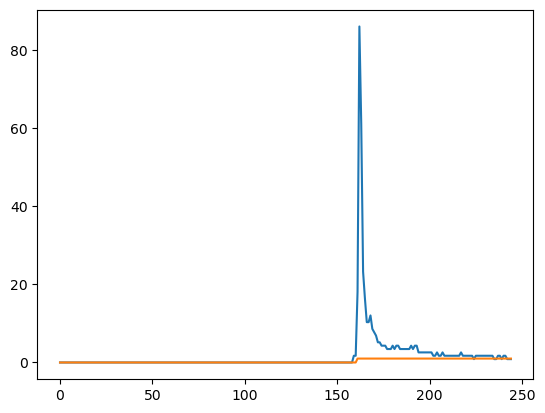

In [164]:
plt.plot(normalized['wth'])
plt.plot(normalized['owth_bin'])

In [165]:
normalized

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,...,wth_bin*Time_C,cowspiracy_bin,cowspiracy_bin*Time,cowspiracy_bin*Time_C,owth_bin,owth_bin*Time,owth_bin*Time_C,yawye_bin,yawye_bin*Time,yawye_bin*Time_C
0,2003-12-31,0.00,0.00,0.00,0.00,0.0,0.00,70.689655,21.16,328.571429,...,0,0,0,0,0,0,0,0,0,0
1,2004-01-31,0.00,0.00,0.00,0.00,0.0,0.00,77.586207,20.01,328.571429,...,0,0,0,0,0,0,0,0,0,0
2,2004-02-29,0.00,0.00,0.00,0.00,0.0,0.00,72.413793,23.00,342.857143,...,0,0,0,0,0,0,0,0,0,0
3,2004-03-31,0.00,0.00,0.00,0.00,0.0,0.00,81.034483,19.32,328.571429,...,0,0,0,0,0,0,0,0,0,0
4,2004-04-30,0.00,0.00,0.00,0.00,0.0,0.00,70.689655,15.87,328.571429,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,2.88,1.72,0.36,3.22,2.0,29.00,139.655172,7.36,1157.142857,...,79,1,240,100,1,240,79,1,240,0
241,2024-01-31,1.92,1.72,0.48,2.53,2.0,5.22,162.068966,8.28,714.285714,...,80,1,241,101,1,241,80,1,241,1
242,2024-02-29,1.92,0.86,0.36,2.07,1.0,2.61,156.896552,7.59,685.714286,...,81,1,242,102,1,242,81,1,242,2
243,2024-03-31,1.92,0.86,0.24,1.84,1.0,2.03,172.413793,7.82,1257.142857,...,82,1,243,103,1,243,82,1,243,3


In [166]:
if have_controls:
    normalized_controls['all_ts_albums'] = normalized_controls[all_ts_albums].sum(axis=1)
    normalized_controls['all_drake_albums'] = normalized_controls[all_drake_albums].sum(axis=1)


#plot_fig(normalized_controls, ['all_ts_albums', 'taylor_swift', 'taylor_swift_lyrics'], col_map)


#plot_fig(normalized_controls, ['all_ts_albums', 'taylor_swift_album',
#                              'taylor_swift_songs', 'taylor_swift_tour'], col_map)

#plot_fig(normalized_controls, ['all_drake_albums', 'drake', 'drake_lyrics'])
#plot_fig(normalized_controls, ['all_drake_albums',  'drake_album', 'drake_songs', 'drake_tour'])

In [167]:
# Sum
normalized['all_docs'] = normalized[all_docs].sum(axis=1)
#normalized_controls['all_ts_albums'] = normalized_controls[all_ts_albums].sum(axis=1)
normalized['owth'] = normalized[['okja', 'wth']].sum(axis=1)
#normalized['all_ethics'] = normalized[all_ethics].sum(axis=1)
normalized['all_climate'] = normalized[all_climate].sum(axis=1)

In [168]:
# Add month dummies
month_dummies = []
for val in normalized['Month'].unique():
    normalized['Month_Dummy' + str(val)] = (normalized['Month'] == val).astype(int)
    month_dummies.append('Month_Dummy' + str(val))
normalized

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,...,Month_Dummy3,Month_Dummy4,Month_Dummy5,Month_Dummy6,Month_Dummy7,Month_Dummy8,Month_Dummy9,Month_Dummy10,Month_Dummy11,Month_Dummy12
0,2003-12-31,0.00,0.00,0.00,0.00,0.0,0.00,70.689655,21.16,328.571429,...,0,0,0,0,0,0,0,0,0,0
1,2004-01-31,0.00,0.00,0.00,0.00,0.0,0.00,77.586207,20.01,328.571429,...,0,0,0,0,0,0,0,0,0,0
2,2004-02-29,0.00,0.00,0.00,0.00,0.0,0.00,72.413793,23.00,342.857143,...,1,0,0,0,0,0,0,0,0,0
3,2004-03-31,0.00,0.00,0.00,0.00,0.0,0.00,81.034483,19.32,328.571429,...,0,1,0,0,0,0,0,0,0,0
4,2004-04-30,0.00,0.00,0.00,0.00,0.0,0.00,70.689655,15.87,328.571429,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,2.88,1.72,0.36,3.22,2.0,29.00,139.655172,7.36,1157.142857,...,0,0,0,0,0,0,0,0,0,0
241,2024-01-31,1.92,1.72,0.48,2.53,2.0,5.22,162.068966,8.28,714.285714,...,0,0,0,0,0,0,0,0,0,0
242,2024-02-29,1.92,0.86,0.36,2.07,1.0,2.61,156.896552,7.59,685.714286,...,1,0,0,0,0,0,0,0,0,0
243,2024-03-31,1.92,0.86,0.24,1.84,1.0,2.03,172.413793,7.82,1257.142857,...,0,1,0,0,0,0,0,0,0,0


In [169]:
normalized[['ds', 'Time']]

,ds,Time
0,2003-12-31,0
1,2004-01-31,1
2,2004-02-29,2
3,2004-03-31,3
4,2004-04-30,4
...,...,...
240,2023-12-31,240
241,2024-01-31,241
242,2024-02-29,242
243,2024-03-31,243


In [170]:
normalized.columns

Index(['ds', 'tgc', 'wth', 'cowspiracy', 'fok', 'okja', 'yawye',
       'sustainability', 'animal_welfare', 'climate', 'climate_change',
       'health', 'vegan', 'vegetarian', 'plant_based_plus_plant_based',
       'vegan_informative', 'vegetarian_informative',
       'plant based_informative', 'vegan_behavior', 'vegetarian_behavior',
       'plant based_behavior', 'behavior_bare', 'informative_bare', 'food',
       'date_col', 'Year_Old', 'Month_Old', 'Day', 'Month', 'Year', 'DATE',
       'rdpi', 'All Fresh Retail Beef', 'Choice Retail Beef', 'ksu_chicken',
       'ksu_pork', 'ksu_beef', 'Date', 'Zhao', 'StewartMilk', 'StewartPBMilk',
       'Time', 'tgc_bin', 'tgc_bin*Time', 'tgc_bin*Time_C', 'fok_bin',
       'fok_bin*Time', 'fok_bin*Time_C', 'okja_bin', 'okja_bin*Time',
       'okja_bin*Time_C', 'wth_bin', 'wth_bin*Time', 'wth_bin*Time_C',
       'cowspiracy_bin', 'cowspiracy_bin*Time', 'cowspiracy_bin*Time_C',
       'owth_bin', 'owth_bin*Time', 'owth_bin*Time_C', 'yawye_bin',
 

In [171]:
normalized['okja_bin']

0      0
1      0
2      0
3      0
4      0
      ..
240    1
241    1
242    1
243    1
244    1
Name: okja_bin, Length: 245, dtype: int64

In [172]:
normalized.columns

Index(['ds', 'tgc', 'wth', 'cowspiracy', 'fok', 'okja', 'yawye',
       'sustainability', 'animal_welfare', 'climate', 'climate_change',
       'health', 'vegan', 'vegetarian', 'plant_based_plus_plant_based',
       'vegan_informative', 'vegetarian_informative',
       'plant based_informative', 'vegan_behavior', 'vegetarian_behavior',
       'plant based_behavior', 'behavior_bare', 'informative_bare', 'food',
       'date_col', 'Year_Old', 'Month_Old', 'Day', 'Month', 'Year', 'DATE',
       'rdpi', 'All Fresh Retail Beef', 'Choice Retail Beef', 'ksu_chicken',
       'ksu_pork', 'ksu_beef', 'Date', 'Zhao', 'StewartMilk', 'StewartPBMilk',
       'Time', 'tgc_bin', 'tgc_bin*Time', 'tgc_bin*Time_C', 'fok_bin',
       'fok_bin*Time', 'fok_bin*Time_C', 'okja_bin', 'okja_bin*Time',
       'okja_bin*Time_C', 'wth_bin', 'wth_bin*Time', 'wth_bin*Time_C',
       'cowspiracy_bin', 'cowspiracy_bin*Time', 'cowspiracy_bin*Time_C',
       'owth_bin', 'owth_bin*Time', 'owth_bin*Time_C', 'yawye_bin',
 

In [173]:
normalized = normalized.rename(columns={'plant based_informative': 'plant_based_informative', 
                                       'plant based_behavior': 'plant_based_behavior'})

0     2003-12-31
1     2004-01-31
2     2004-02-29
3     2004-03-31
4     2004-04-30
         ...    
240   2023-12-31
241   2024-01-31
242   2024-02-29
243   2024-03-31
244   2024-04-30
Name: T, Length: 245, dtype: datetime64[ns]


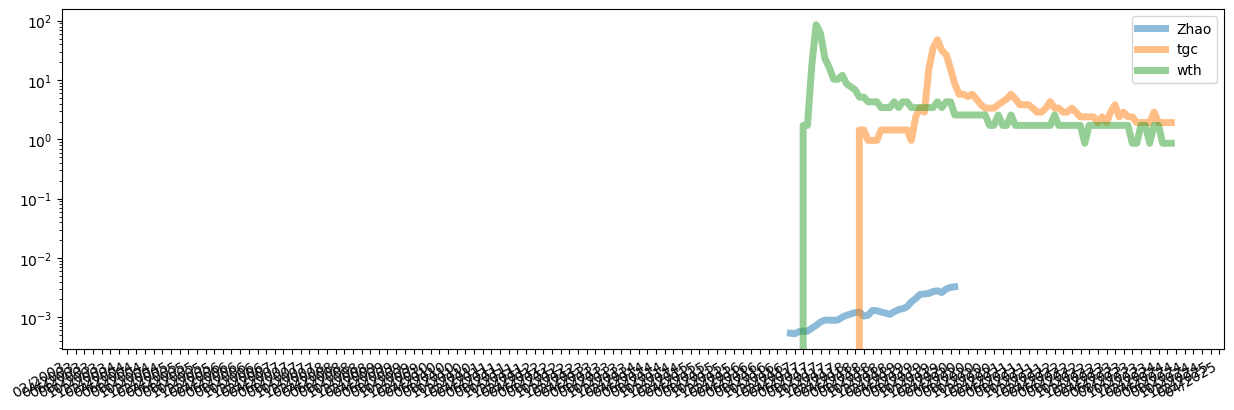

In [174]:
plot_fig(normalized.copy(), ['Zhao', 'tgc', 'wth'], month_interval=2, logscale=True)

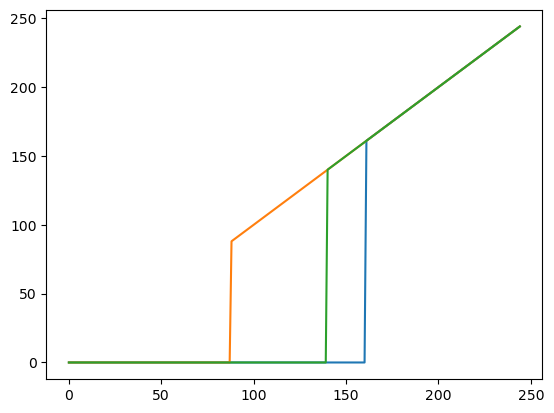

In [175]:
plt.plot(normalized['owth_bin*Time'])
plt.plot(normalized['fok_bin*Time'])
plt.plot(normalized['cowspiracy_bin*Time'])

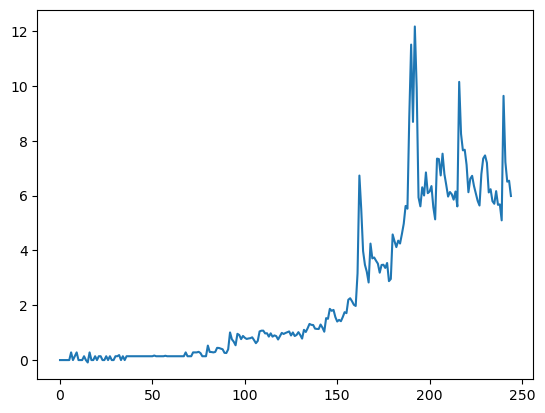

In [176]:
#plt.plot(normalized['vegan'])
plt.plot(normalized['plant_based_informative'])

In [177]:
drop_cols = ['Unnamed: 0.1','DATE']
normalized = normalized[[col for col in normalized.columns if col not in drop_cols]]
normalized.columns

Index(['ds', 'tgc', 'wth', 'cowspiracy', 'fok', 'okja', 'yawye',
       'sustainability', 'animal_welfare', 'climate', 'climate_change',
       'health', 'vegan', 'vegetarian', 'plant_based_plus_plant_based',
       'vegan_informative', 'vegetarian_informative',
       'plant_based_informative', 'vegan_behavior', 'vegetarian_behavior',
       'plant_based_behavior', 'behavior_bare', 'informative_bare', 'food',
       'date_col', 'Year_Old', 'Month_Old', 'Day', 'Month', 'Year', 'rdpi',
       'All Fresh Retail Beef', 'Choice Retail Beef', 'ksu_chicken',
       'ksu_pork', 'ksu_beef', 'Date', 'Zhao', 'StewartMilk', 'StewartPBMilk',
       'Time', 'tgc_bin', 'tgc_bin*Time', 'tgc_bin*Time_C', 'fok_bin',
       'fok_bin*Time', 'fok_bin*Time_C', 'okja_bin', 'okja_bin*Time',
       'okja_bin*Time_C', 'wth_bin', 'wth_bin*Time', 'wth_bin*Time_C',
       'cowspiracy_bin', 'cowspiracy_bin*Time', 'cowspiracy_bin*Time_C',
       'owth_bin', 'owth_bin*Time', 'owth_bin*Time_C', 'yawye_bin',
       'y

In [178]:
normalized

,ds,tgc,wth,cowspiracy,fok,okja,yawye,sustainability,animal_welfare,climate,...,Month_Dummy3,Month_Dummy4,Month_Dummy5,Month_Dummy6,Month_Dummy7,Month_Dummy8,Month_Dummy9,Month_Dummy10,Month_Dummy11,Month_Dummy12
0,2003-12-31,0.00,0.00,0.00,0.00,0.0,0.00,70.689655,21.16,328.571429,...,0,0,0,0,0,0,0,0,0,0
1,2004-01-31,0.00,0.00,0.00,0.00,0.0,0.00,77.586207,20.01,328.571429,...,0,0,0,0,0,0,0,0,0,0
2,2004-02-29,0.00,0.00,0.00,0.00,0.0,0.00,72.413793,23.00,342.857143,...,1,0,0,0,0,0,0,0,0,0
3,2004-03-31,0.00,0.00,0.00,0.00,0.0,0.00,81.034483,19.32,328.571429,...,0,1,0,0,0,0,0,0,0,0
4,2004-04-30,0.00,0.00,0.00,0.00,0.0,0.00,70.689655,15.87,328.571429,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,2.88,1.72,0.36,3.22,2.0,29.00,139.655172,7.36,1157.142857,...,0,0,0,0,0,0,0,0,0,0
241,2024-01-31,1.92,1.72,0.48,2.53,2.0,5.22,162.068966,8.28,714.285714,...,0,0,0,0,0,0,0,0,0,0
242,2024-02-29,1.92,0.86,0.36,2.07,1.0,2.61,156.896552,7.59,685.714286,...,1,0,0,0,0,0,0,0,0,0
243,2024-03-31,1.92,0.86,0.24,1.84,1.0,2.03,172.413793,7.82,1257.142857,...,0,1,0,0,0,0,0,0,0,0


In [179]:
normalized.to_csv('../data/prepared/merged/merged_' + units + '.csv',index=False)
if have_controls:
    normalized_controls.to_csv('../data/prepared/merged/merged_controls_' + units + '.csv',index=False)